## <font color="coral">Into to Matplotlib/Pyplot/Seaborn</font>

#### <font color="coral">In this notebook we'll be looking at the Matplotlib Pyplot and Seaborn libraries for data visualization. This notebook will briefly cover:</font>
    
- Plotting with Matplotlib
- Changing figure aesthetics with 
    
#### <font color="coral"> Notebook usage</font>

This notebook is intended to be worked through top-to-bottom, feel free to change what you'd like and experiment with any ideas you have. To advance in the notebook you can click on each cell and hit the "▶️" button, or pressing "Shift-Enter/Return". Try running the cell below!
    

In [9]:
# Jupyter magic line needed to render nicely in notebook
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

### <font color="coral"> Matplotlib Intuition</font>

It's not an understatement to say that ["Matplotlib is probably the single most used Python package for 2D-graphics"](https://github.com/rougier/matplotlib-tutorial). Importantly, it provides ways to create both quick-and-dirty and publication-quality figures.

Specifically we will use the Pyplot submodule which provides a MATLAB-like interface for plotting. Create your first plot by running the cell below.

In [2]:
z = [1, 2, 3, 4, 5]
z_square = [1, 4, 9, 16, 25]
z_square_inv = [25, 16, 9, 4, 1]
z_log = [0.0, 0.69, 1.1, 1.39, 1.61]
z_10s = [1, 10, 100, 1000, 10000]

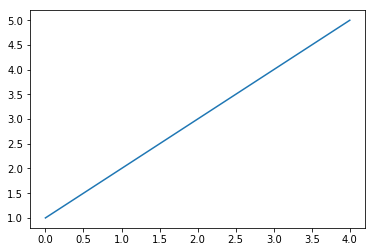

In [3]:
# If we provide a single list to plot, matplotlib assumes it is a sequence 
# of y values, and automatically generates the x values for us
plt.plot(z)

# Display the current plot
plt.show()

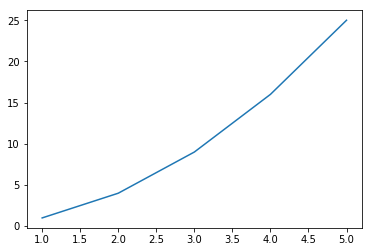

In [4]:
# We can plot x against y if we provide two lists to plot
plt.plot(z, z_square)
plt.show()

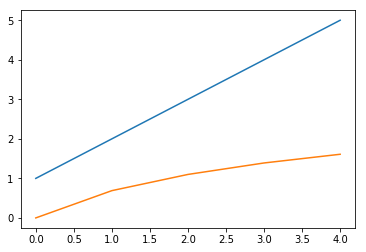

In [5]:
# Calling plotting functions multiple times will layer plots
plt.plot(z)
plt.plot(z_log)
plt.show()

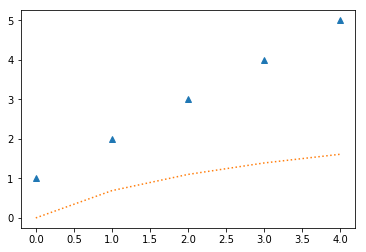

In [6]:
# We can change the style of curve or add markers
plt.plot(z, linestyle='', marker='^')
plt.plot(z_log, linestyle=':')
plt.show()

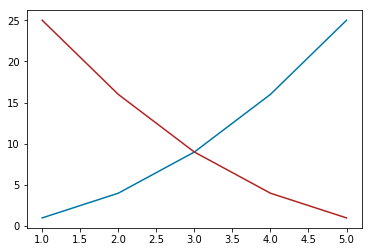

In [7]:
# We can set the color using a hexidecimal color code or a named color
plt.plot(z, z_square, color='#0077AA')
plt.plot(z, z_square_inv, color='firebrick')
plt.show()

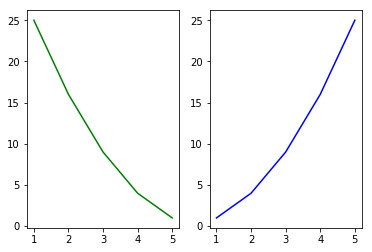

In [10]:
# We can create subplots part of the same figure
# plt.subplots returns both the figure and an array of all the individual axes
fig, axes = plt.subplots(ncols=2)  # nrows defaults to 1

# Plots on the left subplot
axes[0].plot(z, z_square_inv, color='g')


# Plots on the right subplot
axes[1].plot(z, z_square, color='b')

# Diplays the entire figure
fig.show()

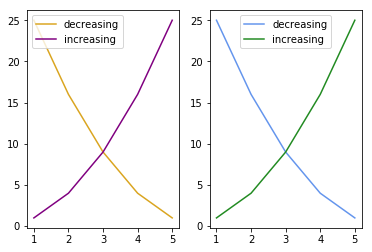

In [11]:
# We can label curves and move the legend
fig, axes = plt.subplots(ncols=2)

axes[0].plot(z, z_square_inv, color='goldenrod', label='decreasing')
axes[0].plot(z, z_square, color='purple', label='increasing')
axes[0].legend(loc='upper left')

axes[1].plot(z, z_square_inv, color='cornflowerblue', label='decreasing')
axes[1].plot(z, z_square, color='forestgreen', label='increasing')
axes[1].legend()  # loc defaults to 'best'

fig.show()

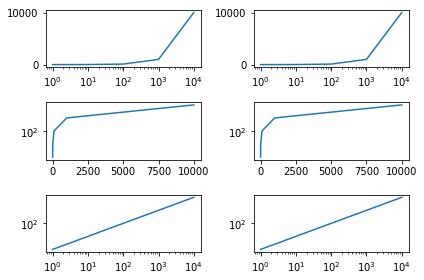

In [12]:
# We can change the scale or plot a semilog graph directly
fig, axes = plt.subplots(nrows=3, ncols=2)

# First row, semilogx
axes[0][0].plot(z_10s, z_10s)
axes[0][0].set_xscale('log')

axes[0][1].semilogx(z_10s, z_10s)

# Second row, semilogy
axes[1][0].plot(z_10s, z_10s)
axes[1][0].set_yscale('log')

axes[1][1].semilogy(z_10s, z_10s)

# Third row, loglog
axes[2][0].plot(z_10s, z_10s)
axes[2][0].set_xscale('log')
axes[2][0].set_yscale('log')

axes[2][1].loglog(z_10s, z_10s)

# Pads space between subplots
fig.tight_layout()
fig.show()

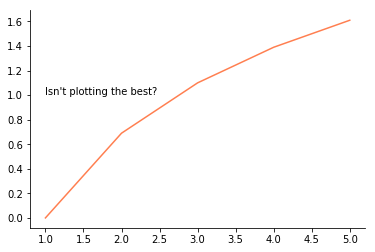

In [13]:
# We can customize most aesthetics of the figure
fig, ax = plt.subplots()
ax.plot(z, z_log, color='coral')

# Hide top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the graph
ax.annotate('Isn\'t plotting the best?', (1, 1))

fig.show()

There are lots of other types of useful plots! Check out the [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) for **a ton** of detailed examples.

- `bar()`: [Make a bar plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar).
- `boxplot()`: [Make a box and whisker plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot).
- `pie()`: [Plot a pie chart](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).
- `plot()`: [Plot y versus x as lines and or markers](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).
- `scatter()`: [A scatter plot of y vs x](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter).

In the above examples we used lists for simplicity, but matplotlib uses numpy `arrays` internally. This means we can pass numpy `arrays` or Pandas `DataFrames` as arguments to any of the plotting functions.

#### <font color="coral"> Aside on seaborn </font>

Seaborn is a Python data visualization library built on top of matplotlib. It's often used for it's R/ggplot-esque aesthetics. 

The functions in Seaborn are functions are tailored towards statistics and play much nicer with Pandas data frames. A full API reference can be found [here](https://seaborn.pydata.org/api.html). 

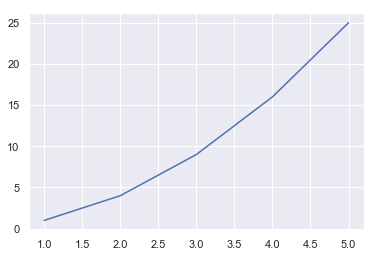

In [15]:
import seaborn as sns

# Configure seaborn as the default for plotting.
sns.set()

# Jupyter magic line needed to render nicely in notebook
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(z, z_square)
fig.show()

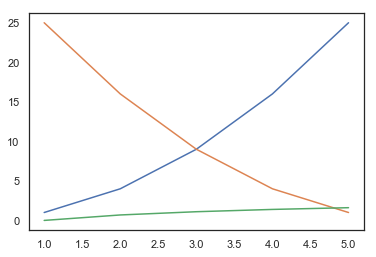

In [18]:
sns.set_style('white')

fig, ax = plt.subplots()
ax.plot(z, z_square)
ax.plot(z, z_square_inv)
ax.plot(z, z_log)
fig.show()

## <font color="coral"> Exploratory Data Analysis with Pandas and Matplotlib

Visualization is a major tool for exploratory data analysis. We can use visualizations both to help us answer questions about our data and uncover new questions to answer.

#### <font color="coral"> Our practice data </font>

The data we will be using is volcano eruption and event data, provided publicity by [RforDataScience](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-05-12/).

Let's look at the data now!

After loading our data, we can remind ourselves the names and data types of each column using the `.info()` method.

In [22]:
volcanoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   volcano_number            928 non-null    int64  
 1   volcano_name              928 non-null    object 
 2   primary_volcano_type      928 non-null    object 
 3   last_eruption_year        928 non-null    object 
 4   country                   928 non-null    object 
 5   region                    928 non-null    object 
 6   subregion                 928 non-null    object 
 7   latitude                  928 non-null    float64
 8   longitude                 928 non-null    float64
 9   elevation                 928 non-null    int64  
 10  tectonic_settings         928 non-null    object 
 11  evidence_category         928 non-null    object 
 12  major_rock_1              928 non-null    object 
 13  population_within_5_km    928 non-null    int64  
 14  population

In [24]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19204 entries, 0 to 19203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   volcano_number       19204 non-null  int64  
 1   volcano_name         19204 non-null  object 
 2   eruption_number      19204 non-null  int64  
 3   eruption_start_year  19204 non-null  int64  
 4   event_number         19204 non-null  int64  
 5   event_type           19204 non-null  object 
 6   event_remarks        2824 non-null   object 
 7   event_date_year      5328 non-null   float64
 8   event_date_month     4938 non-null   float64
 9   event_date_day       4245 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


#### <font color="coral">Investigating distribution of volcano elevation by region</font>

Suppose we want to understand how the distribution of volcano elevation changes between geographic regions. This is the perfect use case for a box plot!

First, let's start off by creating a single box plot for the entire dataset.

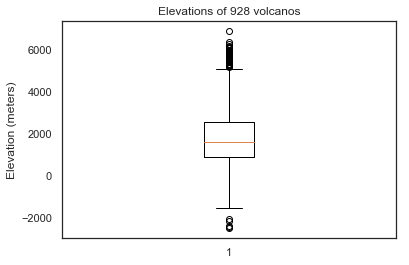

In [40]:
# Instead of a list, we can pass in a column from a Pandas DataFrame to Pyplot directly!
plt.boxplot(volcanoes['elevation'])

# We set axis labels with plt.ylabel and plt.xlabel
plt.ylabel('Elevation (meters)')

# We set the title with plt.title
plt.title(f'Elevations of {len(volcanoes)} volcanos')

plt.show()

We can use `.describe()` from Pandas to quickly get common statistics.

In [42]:
volcanoes['elevation'].describe()

count     928.000000
mean     1863.955819
std      1404.359890
min     -2500.000000
25%       870.000000
50%      1622.500000
75%      2549.250000
max      6879.000000
Name: elevation, dtype: float64

So what's going on with the negative elevation volcanoes? Filter the data frame to only include those with negative elevation and inspect the first few rows using `.head()` from Pandas.

In [45]:
volcanoes[volcanoes['elevation'] < 0].head()

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,tectonic_settings,evidence_category,major_rock_1,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
53,331021,Axial Seamount,Submarine,2015,Undersea Features,Hawaii and Pacific Ocean,Pacific Ocean (northern),45.95,-130.00,-1410,Rift zone / Oceanic crust (< 15 km),Eruption Observed,Basalt / Picro-Basalt,0,0,0,0
123,211070,Campi Flegrei del Mar di Sicilia,Submarine,1867,Italy,Mediterranean and Western Asia,Italy,37.10,12.70,-8,Rift zone / Continental crust (>25 km),Eruption Observed,Trachybasalt / Tephrite Basanite,230578,230578,230578,633350
156,331030,Cleft Segment,Submarine,1986,Undersea Features,Hawaii and Pacific Ocean,Pacific Ocean (northern),44.83,-130.30,-2140,Rift zone / Oceanic crust (< 15 km),Eruption Observed,Basalt / Picro-Basalt,0,0,0,0
158,331020,CoAxial Segment,Submarine,1993,Undersea Features,Hawaii and Pacific Ocean,Pacific Ocean (northern),46.52,-129.58,-2400,Rift zone / Oceanic crust (< 15 km),Eruption Observed,Basalt / Picro-Basalt,0,0,0,0
204,284201,East Diamante,Submarine,Unknown,United States,"Japan, Taiwan, Marianas","Izu, Volcano, and Mariana Islands",15.93,145.67,-127,Subduction zone / Crustal thickness unknown,Unrest / Holocene,Dacite,0,0,0,76403


Our dataset includes submarine volcanoes! This is a great example of how creating quick visualizations can help uncover otherwise hard-to-spot details in our dataset by pointing us in the right direction.

Now let's move on to creating a separate box plot for each region. Before plotting, we should check how many unique regions there are.

In [48]:
volcanoes.region.unique()

array(['Kamchatka and Mainland Asia', 'Africa and Red Sea', 'Alaska',
       'Indonesia', 'Melanesia and Australia', 'Philippines and SE Asia',
       'Middle East and Indian Ocean', 'Japan, Taiwan, Marianas',
       'South America', 'Antarctica', 'México and Central America',
       'Mediterranean and Western Asia', 'Atlantic Ocean',
       'Iceland and Arctic Ocean', 'Canada and Western USA',
       'New Zealand to Fiji', 'Hawaii and Pacific Ocean', 'Kuril Islands',
       'West Indies'], dtype=object)

14 regions might be too many to fit on a single plot. Let's filter our data to only include volcanos in Alaska, Canada and the Western US, and Mexico and Central America.

In [47]:
na_volcanoes = volcanoes[
    volcanoes['region'].isin([
        'Alaska', 'Canada and Western USA', 'México and Central America'
    ])
]
na_volcanoes.head()

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,tectonic_settings,evidence_category,major_rock_1,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
3,311390,Amak,Stratovolcano,1796,United States,Alaska,Aleutian Islands,55.424,-163.149,488,Subduction zone / Continental crust (>25 km),Eruption Observed,Andesite / Basaltic Andesite,0,0,0,1345
12,311190,Amukta,Stratovolcano,1997,United States,Alaska,Aleutian Islands,52.500,-171.252,1066,Subduction zone / Intermediate crust (15-25 km),Eruption Observed,Andesite / Basaltic Andesite,0,0,0,0
18,312090,Aniakchak,Caldera,1931,United States,Alaska,Alaska Peninsula,56.880,-158.170,1341,Subduction zone / Continental crust (>25 km),Eruption Observed,Andesite / Basaltic Andesite,0,0,36,479
25,343010,Apaneca Range,Stratovolcano(es),Unknown,El Salvador,México and Central America,El Salvador and Honduras,13.891,-89.786,2036,Subduction zone / Continental crust (>25 km),Evidence Credible,Basalt / Picro-Basalt,11141,151502,1113282,6215853
26,343071,Apastepeque Field,Volcanic field,Unknown,El Salvador,México and Central America,El Salvador and Honduras,13.720,-88.770,700,Subduction zone / Continental crust (>25 km),Evidence Credible,Dacite,377730,377730,687849,6372608


Without visualizing, we can use Pandas to estimate the distribution of elevation by region. `.describe()` works on data frames grouped by one or more columns too!

In [49]:
na_volcanoes.groupby('region')['elevation'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Alaska,37.0,1457.081081,926.468845,50.0,970.00,1341.0,1863.00,4278.0
Canada and Western USA,58.0,2278.672414,858.706093,-40.0,1706.25,2308.0,2793.50,4392.0
México and Central America,90.0,1919.966667,1295.282872,74.0,953.50,1650.0,2566.75,5564.0


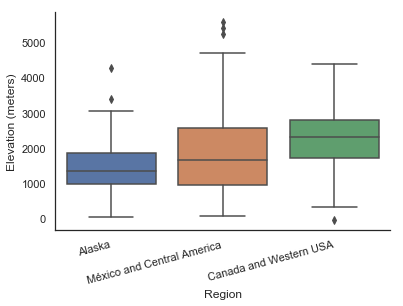

In [118]:
# Create a grouped boxplot using seaborn
fig, ax = plt.subplots()
ax = sns.boxplot(x="region", y="elevation", data=na_volcanoes, ax=ax)

ax.set_xlabel("Region")
ax.set_ylabel("Elevation (meters)")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rotate x-axis labels by 15 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
fig.show()

#### <font color="coral"> Investigating correlation between latitude and longitude </font>

Suppose we want to understand the relationship between the latitude and longitude of volcanos and whether they are correlated.

First let's plot a scatterplot of the latitude and longitude of each volcano colored by its region.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


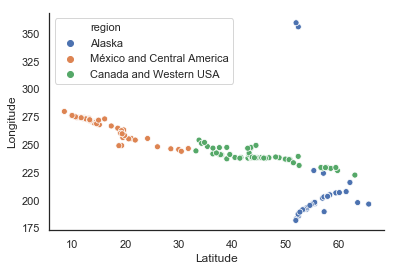

In [139]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=na_volcanoes, x="latitude", y="longitude", hue="region", ax=ax)

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.show()

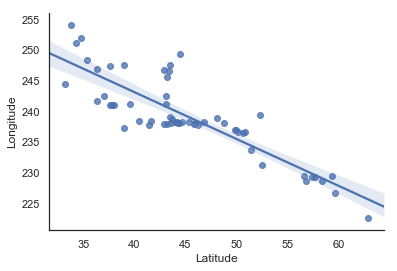

In [142]:
# Let's select only the Canadian and Western American volcanoes
# and fit a regression line.
ca_us_volcanoes = na_volcanoes[na_volcanoes['region'] == 'Canada and Western USA']

fig, ax = plt.subplots()
ax = sns.regplot(data=ca_us_volcanoes, x="latitude", y="longitude", ax=ax)

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.show()

#### <font color="coral"> Now it's your turn! </font>

What's one question that you have about the data we've loaded here? Are there any types of plots that you want to learn how to use?

Use the space below to explore the data and answer your question.